<a href="https://colab.research.google.com/github/Krazahra/Machine-Learning/blob/main/Regression_Case_Neural_Network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Nama: Kinanti Rahayu Az-Zahra

Kelas: TK-45-04

NIM: 1103210052

Dokumentasi GPT: https://chatgpt.com/share/d20e446f-45b7-46d2-b5e4-57a89bda3143

In [8]:
import pandas as pd
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt

In [2]:
!pip install tensorflow

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
# Specify the path to your dataset in Google Drive
file_path = '/content/drive/MyDrive/Dataset/housepricedata.csv'

# Read the CSV file into a Pandas DataFrame
df = pd.read_csv(file_path)

# Display the first few rows of the DataFrame
df.head()

,LotArea,OverallQual,OverallCond,TotalBsmtSF,FullBath,HalfBath,BedroomAbvGr,TotRmsAbvGrd,Fireplaces,GarageArea,AboveMedianPrice
0,8450,7,5,856,2,1,3,8,0,548,1
1,9600,6,8,1262,2,0,3,6,1,460,1
2,11250,7,5,920,2,1,3,6,1,608,1
3,9550,7,5,756,1,0,3,7,1,642,0
4,14260,8,5,1145,2,1,4,9,1,836,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   LotArea           1460 non-null   int64
 1   OverallQual       1460 non-null   int64
 2   OverallCond       1460 non-null   int64
 3   TotalBsmtSF       1460 non-null   int64
 4   FullBath          1460 non-null   int64
 5   HalfBath          1460 non-null   int64
 6   BedroomAbvGr      1460 non-null   int64
 7   TotRmsAbvGrd      1460 non-null   int64
 8   Fireplaces        1460 non-null   int64
 9   GarageArea        1460 non-null   int64
 10  AboveMedianPrice  1460 non-null   int64
dtypes: int64(11)
memory usage: 125.6 KB


In [9]:
# 1. Set AboveMedianPrice as target column, the others as feature columns
X = df.drop('AboveMedianPrice', axis=1)
y = df['AboveMedianPrice']

# 2. Preprocess data using normalization [0,1] for all the feature columns
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# 3. Split the data into 70% data train and 30% data validation and testing
X_train, X_temp, y_train, y_temp = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# 4. Split into 50% data test and data validation of the 30% of data validation and test
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

In [10]:
# 5. Create NN with the specified architecture
model = Sequential([
    Dense(32, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])

In [11]:
# 6. Set the specified architecture
model.compile(optimizer='sgd',
              loss='binary_crossentropy',
              metrics=['accuracy'])


In [13]:
# 7. Train the model with batch_size=32, epochs=300
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), batch_size=32, epochs=300)

# 8. Evaluate the model on the test df
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")

Epoch 1/300
32/32 [==============================] - 1s 19ms/step - loss: 0.2569 - accuracy: 0.8865 - val_loss: 0.1918 - val_accuracy: 0.9178
Epoch 2/300
32/32 [==============================] - 0s 7ms/step - loss: 0.2584 - accuracy: 0.8865 - val_loss: 0.1911 - val_accuracy: 0.9132
Epoch 3/300
32/32 [==============================] - 0s 5ms/step - loss: 0.2575 - accuracy: 0.8875 - val_loss: 0.1919 - val_accuracy: 0.9178
Epoch 4/300
32/32 [==============================] - 0s 4ms/step - loss: 0.2574 - accuracy: 0.8855 - val_loss: 0.1923 - val_accuracy: 0.9178
Epoch 5/300
32/32 [==============================] - 0s 4ms/step - loss: 0.2573 - accuracy: 0.8855 - val_loss: 0.1921 - val_accuracy: 0.9178
Epoch 6/300
32/32 [==============================] - 0s 4ms/step - loss: 0.2568 - accuracy: 0.8875 - val_loss: 0.1943 - val_accuracy: 0.9178
Epoch 7/300
32/32 [==============================] - 0s 3ms/step - loss: 0.2576 - accuracy: 0.8855 - val_loss: 0.1909 - val_accuracy: 0.9132
Epoch 8/300


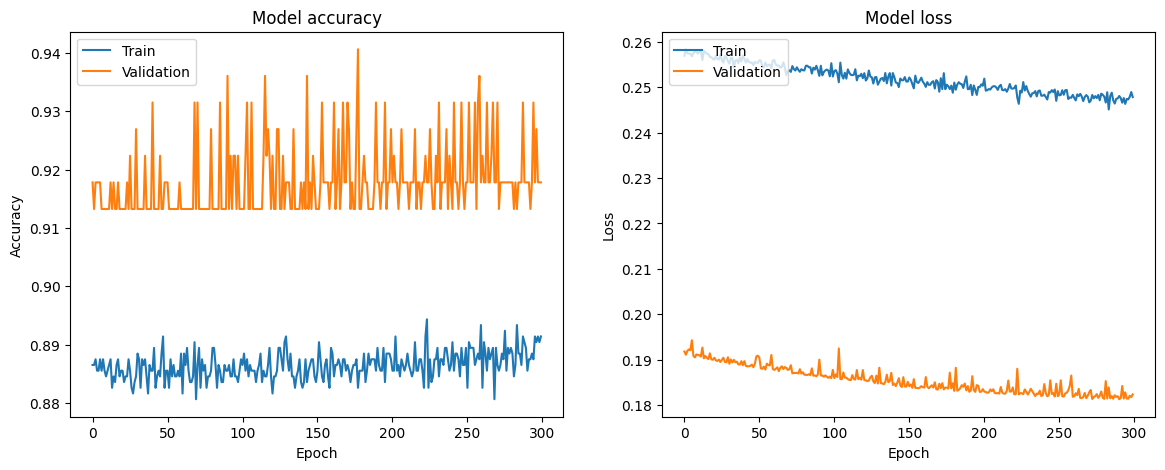

In [14]:
# Visualizing Loss and Accuracy
# Plot training & validation accuracy values
plt.figure(figsize=(14, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.show()